## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

### Aluno : Samuel Hericles Souza Silveira

### Data de realização deste projeto: 31/05/2020

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [314]:
import warnings
warnings.simplefilter("once")
warnings.filterwarnings('ignore')

!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
!pip install yellowbrick=="0.9.0" --quiet
!pip install numpy=="1.16.0" --quiet

    ERROR: Command errored out with exit status 1:
     command: 'c:\python38\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\desconhecido\\AppData\\Local\\Temp\\pip-install-wgtjdas8\\pandas\\setup.py'"'"'; __file__='"'"'C:\\Users\\desconhecido\\AppData\\Local\\Temp\\pip-install-wgtjdas8\\pandas\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\desconhecido\AppData\Local\Temp\pip-record-2nurid8p\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\python38\Include\pandas'
         cwd: C:\Users\desconhecido\AppData\Local\Temp\pip-install-wgtjdas8\pandas\
    Complete output (837 lines):
    running install
    running build
    running build_py
    creating build
    creating build\lib.win32-3.8
    creating build\lib.win32-3.8\pandas
    copying pandas\conftest.py -

    copying pandas\tests\arithmetic\test_datetime64.py -> build\lib.win32-3.8\pandas\tests\arithmetic
    copying pandas\tests\arithmetic\test_numeric.py -> build\lib.win32-3.8\pandas\tests\arithmetic
    copying pandas\tests\arithmetic\test_object.py -> build\lib.win32-3.8\pandas\tests\arithmetic
    copying pandas\tests\arithmetic\test_period.py -> build\lib.win32-3.8\pandas\tests\arithmetic
    copying pandas\tests\arithmetic\test_timedelta64.py -> build\lib.win32-3.8\pandas\tests\arithmetic
    copying pandas\tests\arithmetic\__init__.py -> build\lib.win32-3.8\pandas\tests\arithmetic
    creating build\lib.win32-3.8\pandas\tests\arrays
    copying pandas\tests\arrays\test_array.py -> build\lib.win32-3.8\pandas\tests\arrays
    copying pandas\tests\arrays\test_datetimelike.py -> build\lib.win32-3.8\pandas\tests\arrays
    copying pandas\tests\arrays\test_datetimes.py -> build\lib.win32-3.8\pandas\tests\arrays
    copying pandas\tests\arrays\test_integer.py -> build\lib.win32-3.8\pan

    ERROR: Command errored out with exit status 1:
     command: 'c:\python38\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\desconhecido\\AppData\\Local\\Temp\\pip-install-h5tq8v01\\scipy\\setup.py'"'"'; __file__='"'"'C:\\Users\\desconhecido\\AppData\\Local\\Temp\\pip-install-h5tq8v01\\scipy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\desconhecido\AppData\Local\Temp\pip-record-fcs7nuvl\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\python38\Include\scipy'
         cwd: C:\Users\desconhecido\AppData\Local\Temp\pip-install-h5tq8v01\scipy\
    Complete output (131 lines):
    
    Note: if you need reliable uninstall behavior, then install
    with pip instead of using `setup.py install`:
    
      - `pip install .`       (from a git repo or downloaded so

In [315]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.0.4
Usando seaborn 0.9.0
Usando scipy 1.4.1
Usando yellowbrick 0.9
Usando numpy 1.18.4


In [316]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [317]:
# solução
use_cols = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC",
           "NU_NOTA_MT","NU_NOTA_COMP1", "NU_NOTA_COMP2",
           "NU_NOTA_COMP3","NU_NOTA_COMP4", "NU_NOTA_COMP5"]

enem = pd.read_csv('input/MICRODADOS_ENEM_2017.csv',sep=';',encoding='iso-8859-1',usecols = use_cols,nrows=1000000)


In [318]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [319]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

1000000 elementos e 9 colunas
ERRO! No conjunto de 2017 existem 6731341 dados


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [320]:
# solução

# Solução 2.1 - Abra o arquivo: coloquei na pasta 'microdados/Dicionário_Microdados_Enem_2017.xls'
microdados = pd.read_excel('microdados/Dicionário_Microdados_Enem_2017.xlsx')
microdados.head()

# Solução 2.2 - Explorar colunas com 4 notas e das 5 componentes de redação
# isna() -> verifica se possui células com NaN(not a number)
# any() -> faz o processo isna() em qualquer valor de uma Series ou DataFrame
# tolist() -> converte Serie(vinda um objeto pandas) em list 
todas_as_notas = enem.columns[enem.isna().any()].tolist()
print(type(todas_as_notas))
todas_as_notas

<class 'list'>


['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [321]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [322]:
# solução
aux = enem.shape[0]
print("Existe {} linhas e {} colunas ".format(enem.shape[0],enem.shape[1]))
enem.head()

Existe 1000000 linhas e 9 colunas 


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [323]:
enem = enem.dropna()
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000


In [324]:
print("Existe {} linhas ({} a menos) e {} colunas ".format(enem.shape[0],aux-enem.shape[0],enem.shape[1]))

Existe 739197 linhas (260803 a menos) e 9 colunas 


## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [325]:
# solução e impressão
# sum() -> soma os valores de um dataframe, axis=1 eh linhas e 0 para colunas
enem['nota_total'] = enem.sum(axis=1)
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500


Text(0.5,1,'Boxplot para mostrar medidas de tendência central')

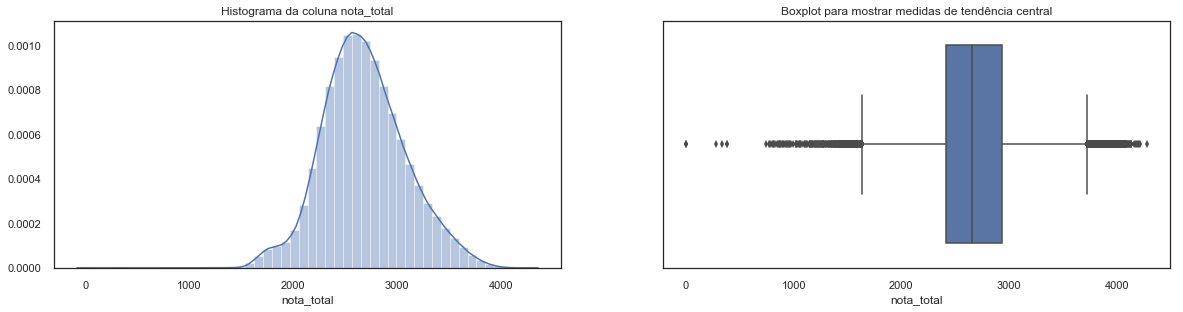

In [326]:
# solução histograma e descrição
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
ax1 = sns.distplot(enem['nota_total'])
ax1.set_title('Histograma da coluna nota_total')

plt.subplot(2,2,2)
ax2 = sns.boxplot(enem['nota_total'])
ax2.set_title('Boxplot para mostrar medidas de tendência central')

In [327]:
print(enem['nota_total'].describe())

count   739197.000
mean      2682.790
std        400.510
min          0.000
25%       2413.200
50%       2657.400
75%       2934.900
max       4276.200
Name: nota_total, dtype: float64


## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição
count   7392.000
mean    2688.880
std      399.211
min     1480.900
25%     2416.050
50%     2665.750
75%     2947.000
max     4038.800
Name: nota_total, dtype: float64


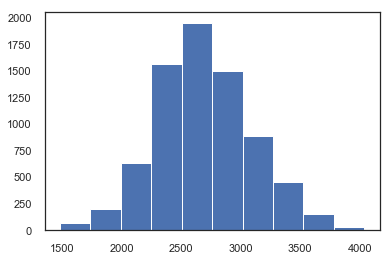

In [328]:
import matplotlib.pyplot as plt

# solução sua função de sampling
def eda_sample(enem):
    # seed
    SEED = 745
    # ou poderia np.random.seed(SEED)
    
    # 1% de sample em enem_eda
    enem_eda = enem['nota_total'].sample(frac=0.01,random_state = SEED)
    print("Enem EDA sampling tem a distribuição")
    
    # descreva a nota_total
    print(enem_eda.describe())
    
    # plote o histograma da nota_total e mostre com plt.show()
    plt.hist(enem_eda)
    plt.show()
    
    """
    A média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?
    - Pelo o historama plotado, vemos a gaussiana está simétrica, diferente da gaussiana com todos os dados logo, pode-se 
    concluir que não representa muito esta amostra 1% de dados aleatória.
    """ 
    
    return enem_eda

enem_eda = eda_sample(enem)

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [329]:
# solução
correlacoes = enem.corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.640,0.592,0.579,0.366,0.348,0.421,0.418,0.383,0.760
NU_NOTA_CH,0.640,1.000,0.723,0.588,0.415,0.382,0.461,0.453,0.416,0.808
NU_NOTA_LC,0.592,0.723,1.000,0.557,0.445,0.375,0.464,0.454,0.403,0.779
NU_NOTA_MT,0.579,0.588,0.557,1.000,0.373,0.349,0.418,0.418,0.373,0.778
NU_NOTA_COMP1,0.366,0.415,0.445,0.373,1.000,0.744,0.819,0.844,0.594,0.716
NU_NOTA_COMP2,0.348,0.382,0.375,0.349,0.744,1.000,0.841,0.779,0.634,0.691
NU_NOTA_COMP3,0.421,0.461,0.464,0.418,0.819,0.841,1.000,0.861,0.680,0.774
NU_NOTA_COMP4,0.418,0.453,0.454,0.418,0.844,0.779,0.861,1.000,0.664,0.764
NU_NOTA_COMP5,0.383,0.416,0.403,0.373,0.594,0.634,0.680,0.664,1.000,0.684
nota_total,0.760,0.808,0.779,0.778,0.716,0.691,0.774,0.764,0.684,1.000


In [330]:
# corrwith -> destaca a correlação(person, por padrão) de uma coluna com as outras
enem[todas_as_notas].corrwith(enem.nota_total)

NU_NOTA_CN      0.760
NU_NOTA_CH      0.808
NU_NOTA_LC      0.779
NU_NOTA_MT      0.778
NU_NOTA_COMP1   0.716
NU_NOTA_COMP2   0.691
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.764
NU_NOTA_COMP5   0.684
dtype: float64

In [331]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [332]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes['nota_total']

In [333]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.760
NU_NOTA_CH      0.808
NU_NOTA_LC      0.779
NU_NOTA_MT      0.778
NU_NOTA_COMP1   0.716
NU_NOTA_COMP2   0.691
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.764
NU_NOTA_COMP5   0.684
nota_total      1.000
Name: nota_total, dtype: float64


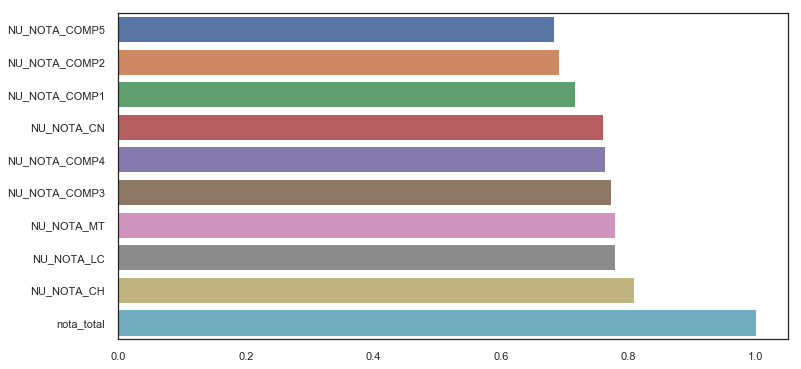

In [334]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr=dados.sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [335]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
enem_eda = enem.sample(frac=0.01,random_state = 42367)
teste = {'NU_NOTA_MT':enem_eda['NU_NOTA_MT'],
         'NU_NOTA_LC':enem_eda['NU_NOTA_LC'],
         'nota_total':enem_eda['nota_total']}
interesse = pd.DataFrame(teste)
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
930621,517.400,397.400,2264.000
485745,512.900,519.500,2686.400
774177,514.900,533.800,2669.800
77536,556.500,552.000,2874.700
287405,566.900,492.200,2622.300


In [336]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    SEED = 42367
    
    # train_test_split
    X = pd.DataFrame(dados.iloc[:,:dados.shape[1]-1])
    y = pd.Series(dados.iloc[:,-1])
    train_x,test_x,train_y,test_y = train_test_split(X,y, random_state = SEED)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [337]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 2) (5544,) (1848, 2) (1848,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 409.33153839131654


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [339]:
# Solução: função para executar a regressão linear
def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    
    # calcule o r2_score com os dados de teste
    from sklearn.metrics import r2_score
    r2_score = r2_score(test_y,test_pred)
    
    # calcule a predição e os dois tipos de erros
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [340]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7911757203210726
mse 34970.056657643836
mae 139.9644278209765


LinearRegression()

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes


    Em sintese, o desvio padrão mostrou um valor muito alto isso conclui que há uma grande variadade de notas dos alunos, ou seja, a difernça de notas entre os alunos é alta. Já o erro médio absoluto que é a distância vertical entre cada ponto e a linha de identidade, logo como o 'mae' no modelo acima mostrou-se alto, logo o valores estão muito distantes.
    
- o que você achou do erro encontrado com o uso desse modelo linear?


    O valores mae, mse e desvio padrão são altos, mas o r2_score um valore próximo a 0.8 que mostra uma forte relação com os dados de entrada e saída.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

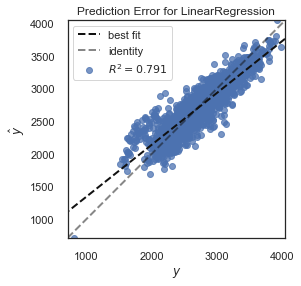

In [341]:
# código pronto
from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

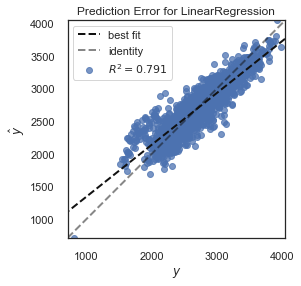

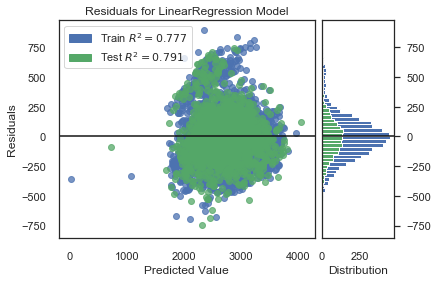

In [342]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [343]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

In [344]:
enem_eda.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
930621,423.400,445.800,397.400,517.400,120.000,120.000,120.000,120.000,0.000,2264.000
485745,535.300,558.700,519.500,512.900,100.000,120.000,100.000,100.000,140.000,2686.400
774177,495.800,565.300,533.800,514.900,140.000,120.000,120.000,100.000,80.000,2669.800
77536,582.200,544.000,552.000,556.500,160.000,100.000,120.000,140.000,120.000,2874.700
287405,470.400,492.800,492.200,566.900,120.000,120.000,120.000,120.000,120.000,2622.300


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 9) (5544,) (1848, 9) (1848,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 1.0
mse 1.592535293228952e-24
mae 9.299189604978073e-13


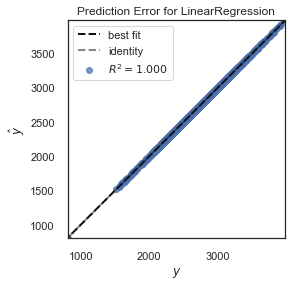

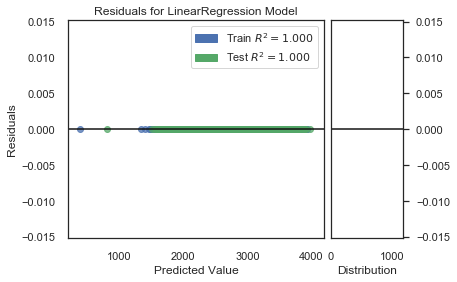

In [345]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total
regressao_completa_para(['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                         'NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2',
                         'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                         'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 0.809829235990179
mse 31846.30830416768
mae 135.39981864205114


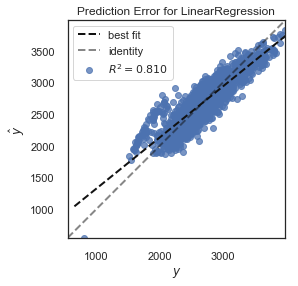

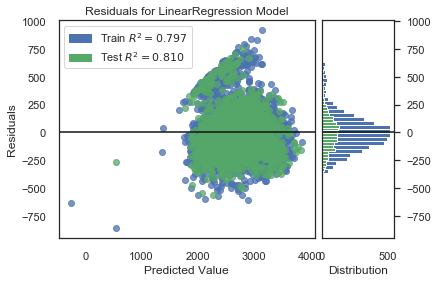

In [346]:
# solução 2: teste outra combinação
regressao_completa_para(['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                         'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 6) (5544,) (1848, 6) (1848,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 0.9570976490383118
mse 7184.498115751197
mae 68.16508169473515


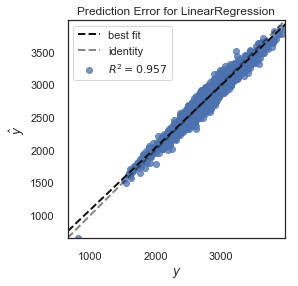

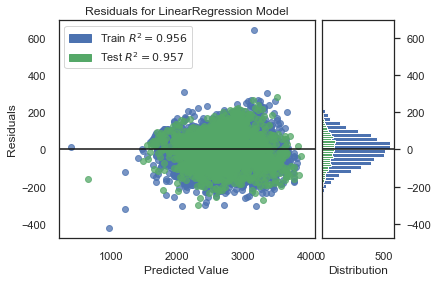

In [347]:
# solução 3: teste outra combinação
regressao_completa_para(['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                         'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                         'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 6) (5544,) (1848, 6) (1848,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 0.9842247704382457
mse 2641.745837266038
mae 40.42330297341353


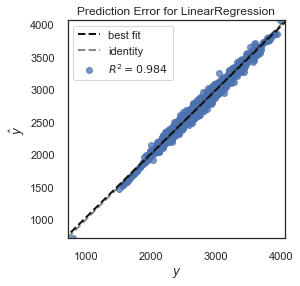

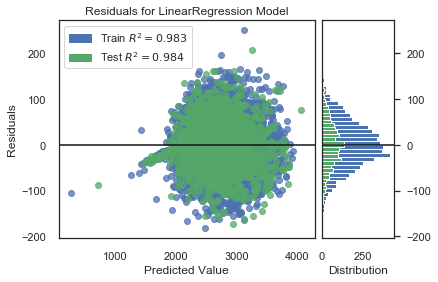

In [348]:
# solução 4: teste outra combinação
regressao_completa_para(['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                         'NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2',
                         'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 6) (5544,) (1848, 6) (1848,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'
 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 0.8865542175937495
mse 18997.816941674573
mae 109.2338845967289


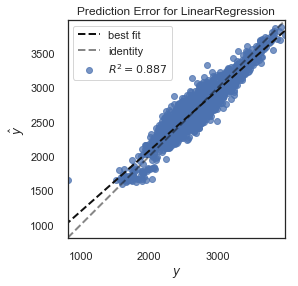

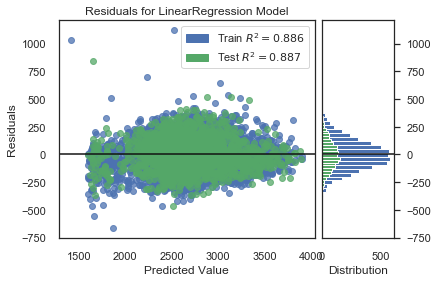

In [349]:
# solução 5: teste outra combinação
regressao_completa_para(['NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2',
                         'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                         'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 7) (5544,) (1848, 7) (1848,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'
 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 0.9811210184390475
mse 3161.5052418243463
mae 45.34648697412364


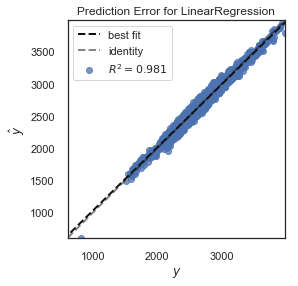

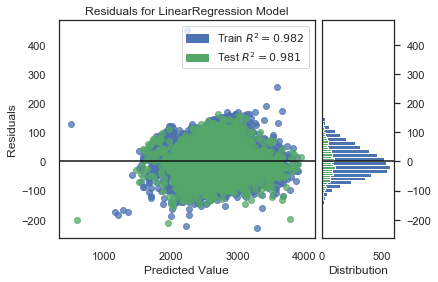

In [350]:
# solução 6: teste outra combinação
regressao_completa_para(['NU_NOTA_CH','NU_NOTA_LC',
                         'NU_NOTA_MT','NU_NOTA_COMP2',
                         'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                         'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 5) (5544,) (1848, 5) (1848,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 0.9649747174598873
mse 5865.391307758564
mae 59.49463010433204


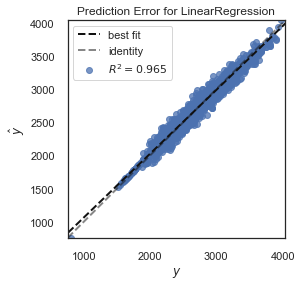

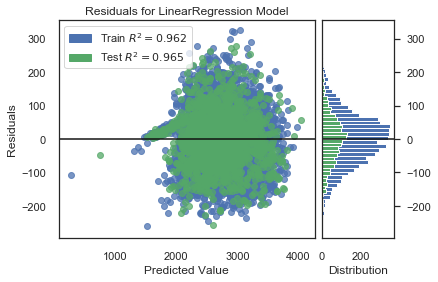

In [351]:
# solução 7: teste outra combinação
regressao_completa_para(['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                         'NU_NOTA_MT','NU_NOTA_COMP1',
                         'nota_total'])

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 409.33153839131654
********************************************************************************
r2 score 0.9284624199842967
mse 11979.800577529884
mae 86.78105480182066


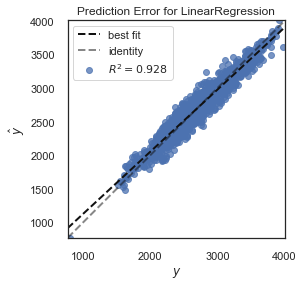

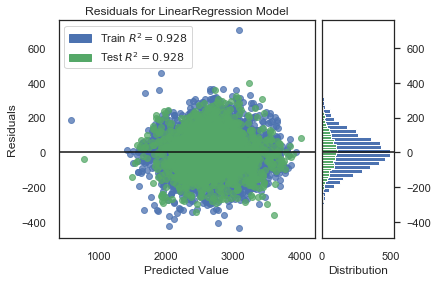

In [352]:
# solução
regressao_completa_para(['NU_NOTA_LC','NU_NOTA_COMP3','NU_NOTA_MT','nota_total'])

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [353]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista
    modelos = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor()]
    return modelos

In [354]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [355]:
# solução

def escolhe_dados(dados, colunas):
    
    # extraia as colunas
    X = pd.DataFrame(dados[colunas])
    
    # faça o split
    SEED = 42
    train_x, test_x, train_y, test_y  = split(X)
    
    # plote o histograma de train_y
    train_y.hist()
    plt.show()
    
    return train_x, test_x, train_y, test_y

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 2) (5544,) (1848, 2) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 110.31828751516723


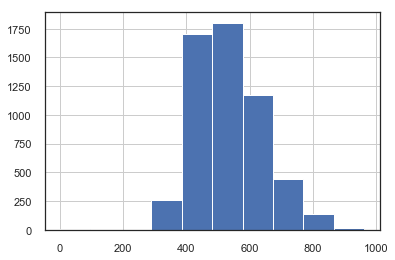

In [356]:
train_x, test_x, train_y, test_y = escolhe_dados(enem_eda,['NU_NOTA_LC','NU_NOTA_COMP3','NU_NOTA_MT'])

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [357]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    
    tic = time.time()
    
    # treine seu modelo 
    modelo.fit(train_x,train_y)
    
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)
        
    # calcule o mse
    mse = mean_squared_error(test_y, test_pred)
    
    # calcule o mae
    mae = mean_absolute_error(test_y, test_pred)
    
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 409.33153839131654


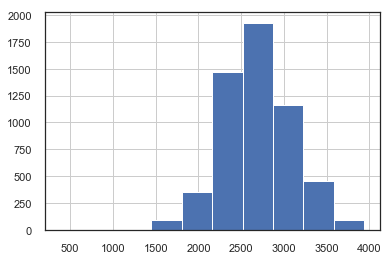

In [358]:
train_x, test_x, train_y, test_y = escolhe_dados(enem_eda,['NU_NOTA_LC','NU_NOTA_COMP3','NU_NOTA_MT','nota_total'])

In [359]:
modelo = DecisionTreeRegressor()
treina_e_mede_regressor(modelo,train_x, test_x, train_y, test_y)

Resultado DecisionTreeRegressor() 22400.492278138525 118.63944805194807


(22400.492278138525, 118.63944805194807, 0.028003692626953125)

In [360]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo        
        # use o make_pipeline ou crie um Pipeline
        pipe = make_pipeline(StandardScaler(),modelo)
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 409.33153839131654


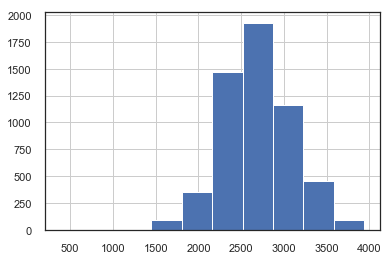

Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) 11979.80057752989 86.78105480182069
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())]) 11985.36809567901 86.83540104376885
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 11979.941545923204 86.78237886607525
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())]) 22750.72083874459 119.6948593073593
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())]) 13833.839580631497 93.00780465367966


,modelo,mse,mae,tempo_de_treino
0,LinearRegression(),11979.801,86.781,0.010
1,Lasso(),11985.368,86.835,0.010
2,Ridge(),11979.942,86.782,0.007
3,DecisionTreeRegressor(),22750.721,119.695,0.030
4,"(DecisionTreeRegressor(max_features='auto', ra...",13833.840,93.008,1.371


In [361]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

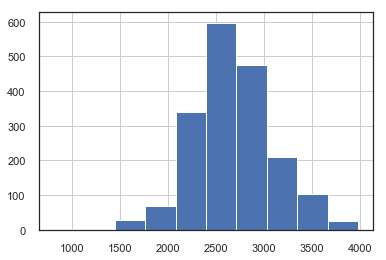

In [362]:
# solução: histograma
test_y.hist()
plt.show()

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [363]:
# solução

def top_p(serie, p = 0.75):
    
    # calcule o quantil p
    quant = serie.quantile([p])
    print("quantile encontrado", quant)
    
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = pd.Series([])
    for i in serie.values:
        if i < quant.values[0]:       
            y = y.append([pd.Series(0)])
        else:
            y = y.append([pd.Series(1)])            
    return y

In [364]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
print(top_25)
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 0.750   7.750
dtype: float64
[0 0 0 0 0 0 0 1 1 1]


In [365]:
# teste do top 10%
top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
print(top_10)
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 0.900   9.100
dtype: float64
[0 0 0 0 0 0 0 0 0 1]


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [366]:
# código pronto
y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 0.750   2920.200
Name: nota_total, dtype: float64


0.25

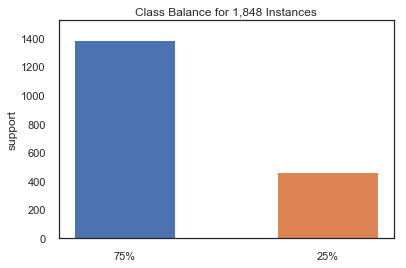

In [367]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

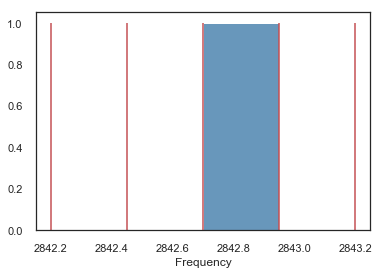

In [368]:
# código pronto
from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y.values[0])
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [369]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [370]:
# solução

def gera_classificadores():
    modelos = [DummyClassifier(),LogisticRegression(),RidgeClassifier(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=10),SVC()]
    return modelos

In [371]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [372]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    np.random.seed(SEED)
    
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.iloc[:,dados.columns != 'top_p']
    print(X.columns)
    
    # defina y como somente a coluna top_p
    y = dados['top_p']
    
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X,y,stratify=y)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [373]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total']).values
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 0.750   2941.100
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.25


## Pergunta: implemente o treino e o teste do classificador

In [374]:
# solução:

import time
from sklearn.metrics import accuracy_score

def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    
    # treine o pipeline
    pipe.fit(train_x,train_y)
    
    tac = time.time()
    tempo_de_treino = tac - tic
    
    # calcule a accuracy_score
    test_pred = pipe.predict(test_x)
    accuracy_score2 = accuracy_score(test_y,test_pred)
    print("Resultado", nome, accuracy_score2)

    return accuracy_score2, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [375]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados.iloc[:, dados.columns != 'nota_total']# selecione somente as colunas especificas de dados
    nota_total = dados['nota_total'] # somente a coluna nota_total
    interesse['top_p'] = top_p(nota_total,p).values # defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 0.750   2941.100
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.25


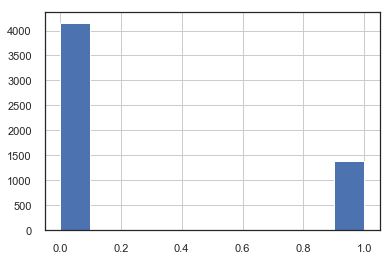

In [376]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [377]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 0.750   2941.100
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.25


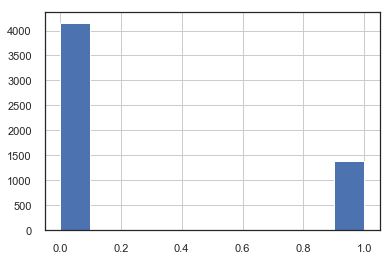

Resultado DummyClassifier 0.6331168831168831
Resultado LogisticRegression 0.9356060606060606
Resultado RidgeClassifier 0.928030303030303
Resultado DecisionTreeClassifier 0.9063852813852814
Resultado RandomForestClassifier 0.9285714285714286
Resultado SVC 0.9301948051948052


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.633,0.007
LogisticRegression,0.936,0.029
RidgeClassifier,0.928,0.009
DecisionTreeClassifier,0.906,0.026
RandomForestClassifier,0.929,0.058
SVC,0.930,0.183


In [378]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.800   3016.980
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2002164502164502


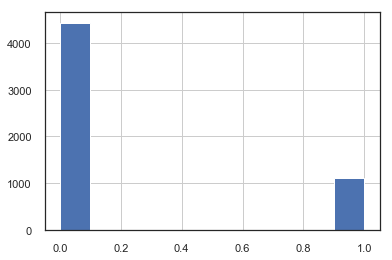

Resultado DummyClassifier 0.670995670995671
Resultado LogisticRegression 0.9464285714285714
Resultado RidgeClassifier 0.9182900432900433
Resultado DecisionTreeClassifier 0.9188311688311688
Resultado RandomForestClassifier 0.9415584415584416
Resultado SVC 0.9442640692640693


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.671,0.007
LogisticRegression,0.946,0.020
RidgeClassifier,0.918,0.010
DecisionTreeClassifier,0.919,0.014
RandomForestClassifier,0.942,0.065
SVC,0.944,0.139


In [379]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda, p = 0.8) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.900   3226.540
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.1001082251082251


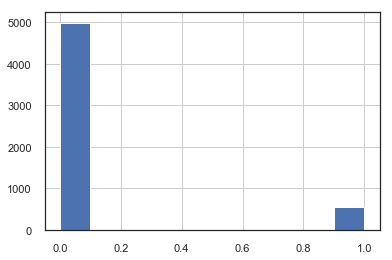

Resultado DummyClassifier 0.8273809523809523
Resultado LogisticRegression 0.9729437229437229
Resultado RidgeClassifier 0.9312770562770563
Resultado DecisionTreeClassifier 0.9550865800865801
Resultado RandomForestClassifier 0.9648268398268398
Resultado SVC 0.9696969696969697


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.827,0.005
LogisticRegression,0.973,0.024
RidgeClassifier,0.931,0.010
DecisionTreeClassifier,0.955,0.017
RandomForestClassifier,0.965,0.063
SVC,0.970,0.088


In [380]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.9) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.950   3395.790
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.049783549783549784


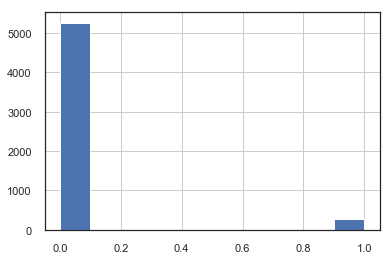

Resultado DummyClassifier 0.908008658008658
Resultado LogisticRegression 0.9837662337662337
Resultado RidgeClassifier 0.9502164502164502
Resultado DecisionTreeClassifier 0.9734848484848485
Resultado RandomForestClassifier 0.9843073593073594
Resultado SVC 0.9837662337662337


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.908,0.005
LogisticRegression,0.984,0.019
RidgeClassifier,0.950,0.012
DecisionTreeClassifier,0.973,0.015
RandomForestClassifier,0.984,0.064
SVC,0.984,0.060


In [381]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.95) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.990   3663.281
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.00974025974025974


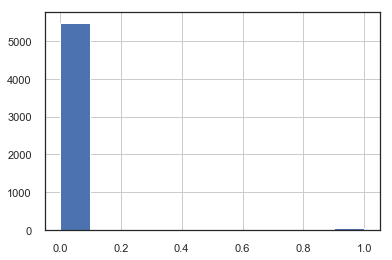

Resultado DummyClassifier 0.9826839826839827
Resultado LogisticRegression 0.9962121212121212
Resultado RidgeClassifier 0.9902597402597403
Resultado DecisionTreeClassifier 0.9913419913419913
Resultado RandomForestClassifier 0.9956709956709957
Resultado SVC 0.9956709956709957


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.983,0.005
LogisticRegression,0.996,0.032
RidgeClassifier,0.990,0.008
DecisionTreeClassifier,0.991,0.013
RandomForestClassifier,0.996,0.042
SVC,0.996,0.027


In [382]:
# solução top 1%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.99) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.250   2417.475
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.75


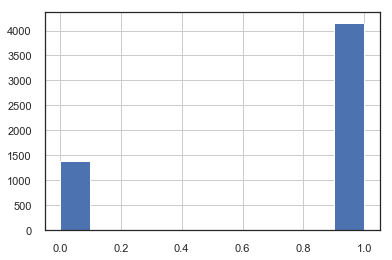

Resultado DummyClassifier 0.6607142857142857
Resultado LogisticRegression 0.9264069264069265
Resultado RidgeClassifier 0.9031385281385281
Resultado DecisionTreeClassifier 0.8944805194805194
Resultado RandomForestClassifier 0.9031385281385281
Resultado SVC 0.9264069264069265


,accuracy_score,tempo_de_treino,pipe
tipo,,,
DummyClassifier,0.661,0.006,"(StandardScaler(), DummyClassifier())"
LogisticRegression,0.926,0.028,"(StandardScaler(), LogisticRegression())"
RidgeClassifier,0.903,0.008,"(StandardScaler(), RidgeClassifier())"
DecisionTreeClassifier,0.894,0.020,"(StandardScaler(), DecisionTreeClassifier())"
RandomForestClassifier,0.903,0.065,"(StandardScaler(), (DecisionTreeClassifier(max..."
SVC,0.926,0.223,"(StandardScaler(), SVC())"


In [383]:
# solução bottom 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.25) 
notas = resultados[['accuracy_score','tempo_de_treino','pipe']]
notas

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 0.750   2941.100
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (5544, 3) (5544,) (1848, 3) (1848,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.25


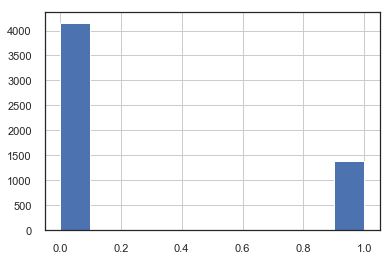

Resultado DummyClassifier 0.6331168831168831
Resultado LogisticRegression 0.9356060606060606
Resultado RidgeClassifier 0.928030303030303
Resultado DecisionTreeClassifier 0.9063852813852814
Resultado RandomForestClassifier 0.9285714285714286
Resultado SVC 0.9301948051948052


,accuracy_score,tempo_de_treino,pipe
tipo,,,
DummyClassifier,0.633,0.005,"(StandardScaler(), DummyClassifier())"
LogisticRegression,0.936,0.015,"(StandardScaler(), LogisticRegression())"
RidgeClassifier,0.928,0.009,"(StandardScaler(), RidgeClassifier())"
DecisionTreeClassifier,0.906,0.030,"(StandardScaler(), DecisionTreeClassifier())"
RandomForestClassifier,0.929,0.066,"(StandardScaler(), (DecisionTreeClassifier(max..."
SVC,0.930,0.179,"(StandardScaler(), SVC())"


In [384]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda) 
notas = resultados[['accuracy_score','tempo_de_treino','pipe']]
notas

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [385]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9356060606060606


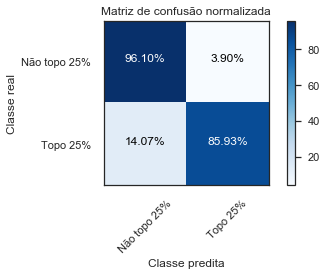

In [386]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9301948051948052


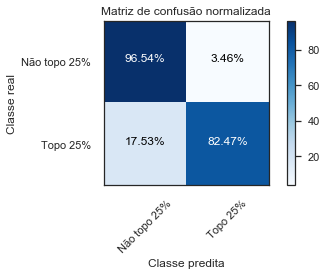

In [387]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [388]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 731805 elementos


In [389]:
enem_validacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500
...,...,...,...,...,...,...,...,...,...,...
999992,523.000,536.400,501.600,528.700,140.000,120.000,80.000,120.000,140.000,2689.700
999994,466.300,423.500,516.400,600.000,100.000,100.000,80.000,100.000,20.000,2406.200
999995,452.500,494.600,494.400,373.600,120.000,200.000,160.000,160.000,120.000,2575.100
999996,626.000,622.400,570.700,663.200,160.000,200.000,180.000,160.000,120.000,3302.300


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [390]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]  # selecione as 3 colunas
    y = top_p(dados.iloc[:,-1]) # calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [391]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X,y = separa_dados_de_classificacao_para_validacao(dados)
    
    scores = cross_val_score(modelo,X,y,verbose = 1, n_jobs = -1) # cv = 5 , por padrão
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

In [ ]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

quantile encontrado 0.750   2934.900
Name: nota_total, dtype: float64


## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [ ]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")

        # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha    
        parcial = X.iloc[:,:X.shape[1]-1].sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.iloc[:,:X.shape[1]-1].sum(axis=1) # some por coluna
        y_pred_true_false = parcial > self.top_25_quantile # compare a soma parcial com o self.top25_quantile
        y_pred = y_pred_true_false # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

In [ ]:
enem_validacao = enem_validacao[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3","nota_total"]]
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

In [ ]:
enem_validacao = enem_validacao[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3","nota_total"]]
treina_e_valida_modelo_de_classificacao(enem_validacao, DummyClassifier())

## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

# Solução

   Estes ultimos modelos foram utilizados os dados que não foram estudados até então. Logo o modelo heurística que corresponde a classe **HeuristicaTop25** no qual foi uma **simples soma por colunas(não por linhas)** junto com um binning sobre top25% e obteve acurácia aproximadamente de **90%**. Além disso, **identificou bem as notas** que não estavam no top 25% (**93.02%**), **mas** tem um alto valor de falsos positivos para detecção dos top 25%(**20.97%**). Com isso, o modelo **DummyClassifier** usamos também como baseline que resultou em acurácia de 62.5%, acertou bem as notas que não estavam top25% com **75.08%** mas errou muito as notas que estavam nesse intervalo com **74.98%**.
   
   
   Por fim, o modelo **logisticRegression** superou nossa baseline com acurácia de quase **94%** e segundo sua matriz de confusão acertou bem as notas top25% com **96.47%** os que não estavam no top25% e **86.47%** os que estão no top25%.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

  Caso um aluno ou aluna vá apenas para o primeiro dia de prova que consiste em linguagens e códigos, ciências humanas e a redação. Além disso, supondo apenas que resolveu as questões objetivas. Temos as três colunas: `['NU_NOTA_CH','NU_NOTA_LC','nota_total']`, sendo assim, calculando a soma da diferença entre as colunas `['NU_NOTA_CH','NU_NOTA_LC']` podemos obter uma acurácia de quase **78%**.

In [ ]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[['NU_NOTA_CH','NU_NOTA_LC']]
    y = top_p(dados.iloc[:,-1])
    print("Média da validação", y.mean())
    return X, y

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    X,y = separa_dados_de_classificacao_para_validacao(dados)
    
    scores = cross_val_score(modelo,X,y,verbose = 1, n_jobs = -1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

class HeuristicaPrimeiroDia:
    
    def fit(self, X, y = None):
        parcial = X.diff().sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.diff().sum(axis=1)
        y_pred_true_false =  parcial > self.top_25_quantile
        y_pred = y_pred_true_false
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

In [ ]:
enem_eda_primeiro_dia_sem_redacao = enem_eda[['NU_NOTA_CH','NU_NOTA_LC','nota_total']]
treina_e_valida_modelo_de_classificacao(enem_eda_primeiro_dia_sem_redacao, HeuristicaPrimeiroDia())

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

 A primeira pergunta a se fazer é: **para qual curso a bolsa se destina?** pois não pode-se basear a predição das notas do modelo top25%, mas também o curso, pois há universidades com formações bem concorridas em todo o brasil, assim partidindo do modelo criado **top25%** podemos disponibilizar este para uma filtragem de alunos e alunas e a partir daí a universidade usar os resultados do modelo para redirecionar para  

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!